In [4]:
!export HF_HUB_ENABLE_HF_TRANSFER=1

from diffusers import FluxPipeline, FluxTransformer2DModel, GGUFQuantizationConfig 
from google import genai
from google.genai import types as gtypes
from IPython.display import Image
import torch

from ai_storyteller.utils.env_utils import get_env_var

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Gemini

# Hugging Face Inference Providers

* [Table of Inference Providers partners](https://huggingface.co/docs/inference-providers/en/index#partners)

# GGUF

* [Diffusers documentation about GGUF](https://huggingface.co/docs/diffusers/v0.33.1/en/quantization/gguf#supported-quantization-types)
* [Overview of GGUF quantization methods | Reddit](https://www.reddit.com/r/LocalLLaMA/comments/1ba55rj/overview_of_gguf_quantization_methods/)
* [Official GGUF documentation](https://github.com/ggml-org/ggml/blob/master/docs/gguf.md)

In [ ]:
ckpt_path = (
    "https://huggingface.co/city96/FLUX.1-dev-gguf/blob/main/flux1-dev-Q4_K_S.gguf"
)
transformer = FluxTransformer2DModel.from_single_file(
    ckpt_path,
    quantization_config=GGUFQuantizationConfig(compute_dtype=torch.bfloat16),
    torch_dtype=torch.bfloat16,
)
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    transformer=transformer,
    torch_dtype=torch.bfloat16,
)
pipe.enable_model_cpu_offload()
prompt = "A cat holding a sign that says hello world"
image = pipe(prompt, generator=torch.manual_seed(0)).images[0]
save_path = "flux-gguf.png"
image.save(save_path)

flux1-dev-Q4_K_S.gguf:   0%|          | 0.00/6.81G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

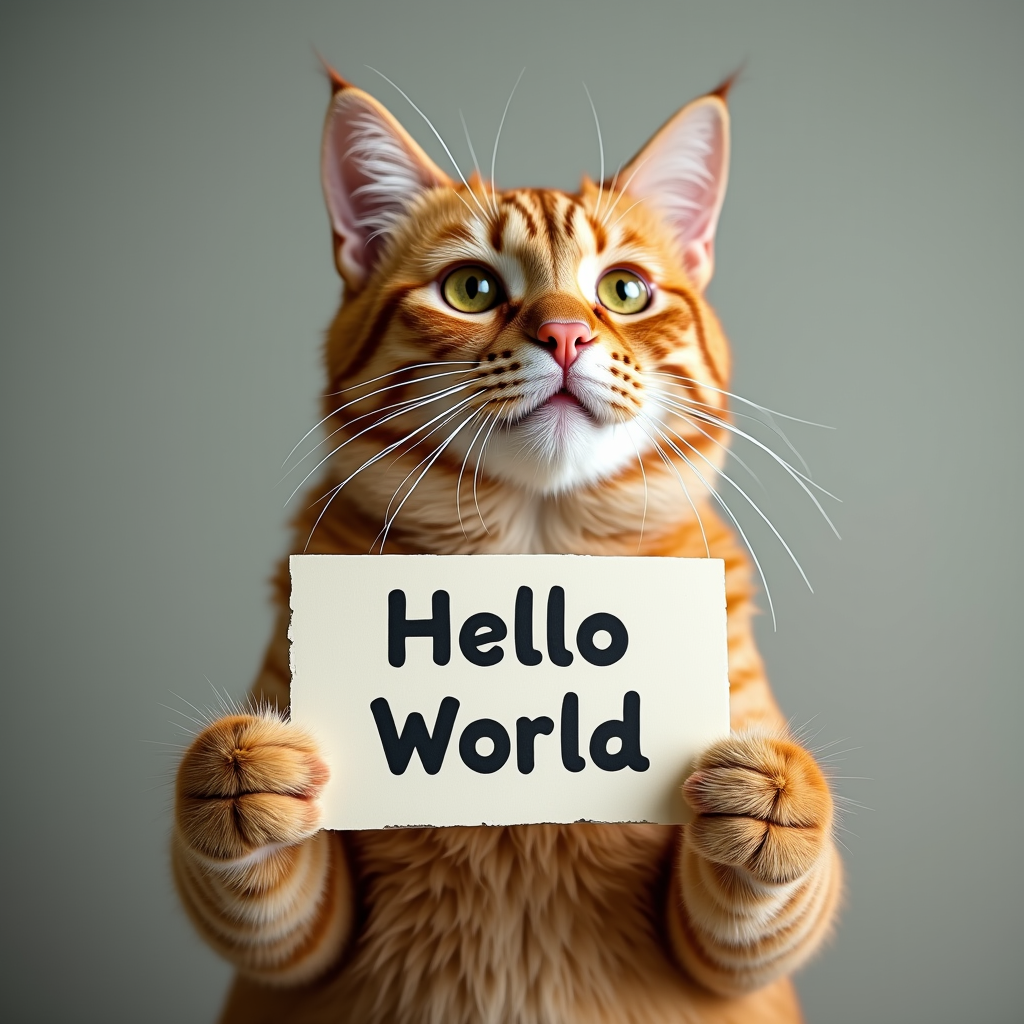

In [5]:
display(Image(filename=save_path))

## Take image + text and output image

https://huggingface.co/stabilityai/stable-diffusion-2-inpainting

For example, in a children's book, you can have the reader inserted into the world.